# Support Vector Machines - team Euler

Support Vector Machines is een vorm van supervised learning. We hebben een we een dataset, waarbij elk punt $p$ features heeft en tot één van twee verschillende groepen behoort. We zullen deze ML techniek gebruiken om aan classificatie te doen, zodat we het getrainde SVM-model kunnen toepassen op andere (test)datasets, om zo te voorspellen of de punten van deze datasets (ook met $p$ features) tot de ene of tot de andere groep behoren.

In [677]:
from toepassing_procedures import *
import numpy as np
# data inladen
import pandas as pd
from pandas import read_csv
# data opsplitsen in trainings-, validatie- en testset
from sklearn.model_selection import train_test_split
# grafieken
from matplotlib import pyplot as plt
from matplotlib import rc

Met SVM zullen we de datapunten onderverdelen in twee groepen door ze te scheiden met een $(p-1)$-dimensioneel _hyperplane_. Aangezien we hogere dimensies niet kunnen visualiseren, zullen we hier werken met een dataset waarbij elk punt 2 features heeft. We zullen vervolgens lineaire classificatie doen om de dataset onder te verdelen in twee groepen.

Elk punt heeft 2 features, $x_1$ en $x_2$ en een $y$, de classificatie van -1 of 1.

We construeren twee hypervlakken die de twee gegevensklassen scheiden, zodat de afstand daartussen zo groot mogelijk is. Het gebied dat wordt begrensd door deze twee hypervlakken wordt de "marge" genoemd, en het hypervlak ertussen noemen we de beslissingsgrens. We willen de marge zo groot mogelijk maken.

De vergelijkingen van die rechten kunnen geschreven worden als $w^Tx-b=1$ (1) en $w^Tx-b=-1$ (2). Alle punten op of boven grens (1) worden geclassificeerd als behorend tot de ene klasse ($y=1$). Alle punten onder of op grens (2) worden geclassificeerd als behorend tot de andere klasse ($y=-1$).

De breedte van de marge is $\frac{2}{||\vec{w}||}$. Om de breedte van de marge te maximaliseren, zullen we $||\vec{w}||$ dus minimaliseren.

We willen de marge tussen de datapunten en het hyperplane zo groot mogelijk maken, maar we willen ook de fouten beperken. We voeren _hinge loss_ in met bijhorende formule $\max{[0,1-y_i(\vec{w}\cdot\vec{x}_i-b)]}$ We hebben nu twee mogelijkheden:

1. $y_i(\vec{w}\cdot\vec{x}_i-b)\ge1$:
Het punt werd correct geclassificeerd en ligt aan de juiste kant van de beslissingslijn, buiten de marge. De hinge loss is in dit geval 0.

2. Het punt ligt in de marge of aan de verkeerde kant van de belissingslijn. Indien het datapunt binnen de marge ligt, zal de hinge loss tussen 0 en 1 liggen. Het punt wordt dan niet heel _confidently_ geclassificeerd, maar we willen het ook niet te hard bestraffen. Indien een datapunt buiten de marge, maar aan de verkeerde kant van de beslissingslijn ligt, zal de hinge loss groter dan 1 zijn. We willen het model wel hard bestraffen, want zo'n fouten willen we miniem houden. De hinge loss wordt dan $1 - y_i(\vec{w}\cdot\vec{x}_i - b)$.

Om nu de SVM te trainen, moeten we het minimalisatieprobleem $\min_{w, b}J$ = $\min_{w, b}\left[\frac{1}{n}\sum_{i=1}^n{\max{[0,1-y_i(\vec{w}\cdot\vec{x}_i-b)]}} + \lambda\cdot{||\vec{w}||}^2\right]$ oplossen. We noemen $J$ de kostfunctie.

Hierbij is $\frac{1}{n}\sum_{i=1}^n{\max{[0,1-y_i(\vec{w}\cdot\vec{x}_i-b)]}}$ de gemiddelde hinge loss, dus de gemiddelde fout die wordt toegekend.

De tweede term $\lambda\cdot{||\vec{w}||}^2$ regelt het evenwicht tussen het minimaliseren van de fouten op de trainingsdata en het maximaliseren van de marge. 
- Kleine $\lambda$ (kan ook 0 zijn): het berekenen van een minimale kostfunctie $J$ komt neer op het op nul zetten van zo veel mogelijke hinge losses. Dit resulteert in een kleine marge.
- Grote $\lambda$: er ligt meer nadruk op het minimaliseren van de grootte van $||\vec{w}||$ en de hinge loss speelt een minder grote rol. Hoe kleiner $||\vec{w}||$, hoe groter de marge want de marge is $\frac{2}{||\vec{w}||}$ breed. Een grote $\lambda$ resulteert dus in een grotere marge.

De kostfunctie $J_i$ voor een enkel datapunt in _geval 1_ is dan $\lambda\cdot{||\vec{w}||}^2$. <br>
Dus geldt $\frac{d}{dw}(J_i)=2\lambda w$ en $\frac{d}{db}(J_i)=0$<br><br>


De kostfunctie $J_i$ voor een enkel datapunt in _geval 2_ is $1-y_i(\vec{w}\cdot\vec{x}_i-b) + \lambda\cdot{||\vec{w}||}^2$. <br>
Dus geldt $\frac{d}{dw}(J_i)=2\lambda w-y_i\cdot x_i$ en $\frac{d}{db}(J_i)=y_i$

We kunnen na het bovenstaande de variabelen `w` en `b` aanpassen in onze code zodat `w-=leerTempo*(2*lambda*w)` indien we in geval (1) zitten. In geval twee moeten we zowel w als b aanpassen, zodat `w-=leerTempo*(2*lambda*w-x_i-y_i)` en `b-=leerTempo*y`

### Toegepast op twee lineair scheidbare 'wolken' datapunten

In [678]:
# maak twee lineair scheidbare clusters
# de y-waarde voor elk punt (met twee features) is 0 of 1
# voeg ook een outlier toe
X, y = datasets.make_blobs(
    n_samples=30, n_features=2, centers=2, cluster_std=2
)

# verander de y-waarden die 0 zijn in -1
y = np.where(y == 0, -1, 1)

# verander een willekeurige y-waarde van 1 naar -1
random_index = np.random.randint(0, len(y))
if y[random_index] == 1:
    y[random_index] = -1
else:
    y[random_index] = 1

# verdeel de data in 50% training, 25% validatie en 25% test
trainingX, testX, trainingY, testY = train_test_split(X, y, test_size=0.5)
validatieX, testX, validatieY, testY = train_test_split(testX, testY, test_size=0.5)

print("Aantal training samples: ", len(trainingX))
print("Aantal validatie samples: ", len(validatieX))
print("Aantal test samples: ", len(testX))

Aantal training samples:  15
Aantal validatie samples:  7
Aantal test samples:  8


In [679]:
print(trainingX)
print(trainingY)

[[ 8.49562589 -2.39801833]
 [ 6.62630714  0.57112239]
 [ 6.52330403 -1.61805983]
 [ 6.95364551  4.86097724]
 [11.06830318  1.32876286]
 [ 3.3057658  -3.1162286 ]
 [ 1.18997837 -7.80406921]
 [ 7.88689932 -0.98423582]
 [ 6.27241197 -1.74087653]
 [ 2.56072856 -8.16334361]
 [ 0.42784034 -5.72682048]
 [ 2.80127601 -7.68560074]
 [ 3.74335476 -5.42582119]
 [ 2.11146261 -5.17476797]
 [ 6.88880081 -2.15191708]]
[ 1  1  1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1  0]


In [680]:
leerTempo = 0.001
lambdaParam = 0.01
aantalIteraties = 10000

w, b = fit(trainingX, trainingY, leerTempo, lambdaParam, aantalIteraties)

print(f"De supportvector w is {w} en b is {b}")

De supportvector w is [0.38904459 0.61819755] en b is 0.36300000000000027


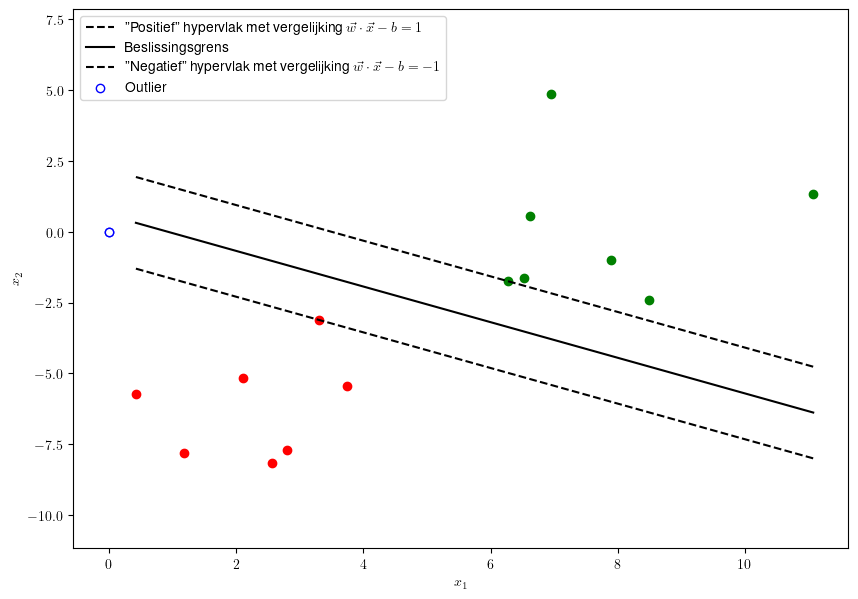

In [681]:
voorsp = voorspelling(trainingX, w, b)

truePositives = [trainingX[i] for i in range(len(trainingX)) if voorsp[i] == 1 and trainingY[i] == 1]
falsePositives = [trainingX[i] for i in range(len(trainingX)) if voorsp[i] == 1 and trainingY[i] == -1]
trueNegatives = [trainingX[i] for i in range(len(trainingX)) if voorsp[i] == -1 and trainingY[i] == -1]
falseNegatives = [trainingX[i] for i in range(len(trainingX)) if voorsp[i] == -1 and trainingY[i] == 1]

fig = plt.figure(figsize=(10, 7))
plt.rcParams['text.usetex'] = True

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

ax = fig.add_subplot(1, 1, 1)

plt.scatter([p[0] for p in truePositives], [p[1] for p in truePositives], marker="o", c="g")
plt.scatter([p[0] for p in falsePositives], [p[1] for p in falsePositives], marker="x", c="r")
plt.scatter([p[0] for p in trueNegatives], [p[1] for p in trueNegatives], marker="o", c="r")
plt.scatter([p[0] for p in falseNegatives], [p[1] for p in falseNegatives], marker="x", c="g")

x0_1 = min(trainingX[:, 0])
x0_2 = max(trainingX[:, 0])

x1_1 = hyperplaneFunctie(x0_1, w, b, 0)
x1_2 = hyperplaneFunctie(x0_2, w, b, 0)

x1_1_m = hyperplaneFunctie(x0_1, w, b, -1)
x1_2_m = hyperplaneFunctie(x0_2, w, b, -1)

x1_1_p = hyperplaneFunctie(x0_1, w, b, 1)
x1_2_p = hyperplaneFunctie(x0_2, w, b, 1)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")


ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k--", label=r'"Positief" hypervlak met vergelijking \(\vec{w} \cdot \vec{x} - b = 1\)')
ax.plot([x0_1, x0_2], [x1_1, x1_2], "k", label="Beslissingsgrens")
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k--", label=r'"Negatief" hypervlak met vergelijking \(\vec{w} \cdot \vec{x} - b = -1\)')
# ax.scatter([0,0],[0,0], marker="o", c="w", label="Support Vectors", edgecolors="b")
ax.scatter([0,0],[0,0], marker="o", c="w", label="Outlier", edgecolors="b")

x1_min = np.amin(trainingX[:, 1])
x1_max = np.amax(trainingX[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

plt.legend()
plt.savefig("metoutlier.pdf")
plt.show()

### Toegepast op de tumordata

In [682]:
# # We laden de data
# gegevens = read_csv("data.csv").sample(n=30)

# rand = np.random.randint(0, 28)

# featureIndices = [2, 3]

# # We selecteren de kolommen met de features (x-waarden)
# trainingFeatures = gegevens.iloc[:, featureIndices]
# # We selecteren de kolom met de diagnoses (y-waarden)
# trainingDiagnoses = gegevens.iloc[:, 1]

# feature1 = trainingFeatures.columns[0]
# feature2 = trainingFeatures.columns[1]

# print(f"Naam feature 1: {trainingFeatures.columns[0]}")
# print(f"Naam feature 2: {trainingFeatures.columns[1]}")

# trainingX = trainingFeatures.values
# trainingY = [1 if diagnose == "B" else -1 for diagnose in trainingDiagnoses.values]

In [683]:
print(trainingX)
print(trainingY)

[[ 8.49562589 -2.39801833]
 [ 6.62630714  0.57112239]
 [ 6.52330403 -1.61805983]
 [ 6.95364551  4.86097724]
 [11.06830318  1.32876286]
 [ 3.3057658  -3.1162286 ]
 [ 1.18997837 -7.80406921]
 [ 7.88689932 -0.98423582]
 [ 6.27241197 -1.74087653]
 [ 2.56072856 -8.16334361]
 [ 0.42784034 -5.72682048]
 [ 2.80127601 -7.68560074]
 [ 3.74335476 -5.42582119]
 [ 2.11146261 -5.17476797]
 [ 6.88880081 -2.15191708]]
[ 1  1  1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1  0]


In [684]:
# leerTempo = 0.001
# aantalIteraties = 1000

# lambdaParams = [0.01, 0.1, 1, 10]

# plt.figure(figsize=(12, 12))

# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# ## for Palatino and other serif fonts use:
# #rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)

# x0_1 = min(trainingX[:, 0])
# x0_2 = max(trainingX[:, 0])

# x1_min = min(trainingX[:, 1])
# x1_max = max(trainingX[:, 1])

# for i, lambdaParam in enumerate(lambdaParams):

#     ax = plt.subplot(2, 2, i + 1)
#     ax.set_title(f"$\lambda = {lambdaParam}$")

#     ax.set_xlabel("Gemiddelde radius")
#     ax.set_ylabel('Gemiddelde textuur')

#     w, b = fit(trainingX, trainingY, leerTempo, lambdaParam, aantalIteraties)

#     voorsp = voorspelling(trainingX, w, b)

#     truePositive = [trainingX[i] for i in range(len(trainingX)) if voorsp[i] == 1 and trainingY[i] == 1]
#     falsePositive = [trainingX[i] for i in range(len(trainingX)) if voorsp[i] == 1 and trainingY[i] == -1]
#     trueNegative = [trainingX[i] for i in range(len(trainingX)) if voorsp[i] == -1 and trainingY[i] == -1]
#     falseNegative = [trainingX[i] for i in range(len(trainingX)) if voorsp[i] == -1 and trainingY[i] == 1]

#     ax.scatter([p[0] for p in truePositive], [p[1] for p in truePositive], marker="o", c="g")
#     ax.scatter([p[0] for p in falsePositive], [p[1] for p in falsePositive], marker="x", c="r")
#     ax.scatter([p[0] for p in trueNegative], [p[1] for p in trueNegative], marker="o", c="r")
#     ax.scatter([p[0] for p in falseNegative], [p[1] for p in falseNegative], marker="x", c="g")

#     x1_1 = hyperplaneFunctie(x0_1, w, b, 0)
#     x1_2 = hyperplaneFunctie(x0_2, w, b, 0)

#     x1_1_m = hyperplaneFunctie(x0_1, w, b, -1)
#     x1_2_m = hyperplaneFunctie(x0_2, w, b, -1)

#     x1_1_p = hyperplaneFunctie(x0_1, w, b, 1)
#     x1_2_p = hyperplaneFunctie(x0_2, w, b, 1)

#     ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")
#     ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k--")
#     ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k--")
#     ax.set_ylim([x1_min - 3, x1_max + 3])

# plt.savefig("svm2.pdf")
# plt.show()